In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import KFold
from sklearn import preprocessing as pre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Ridge

In [2]:
housingData = pd.read_csv('./new_housing.csv')
#display(housingData)

#housingData.ocean_proximity.values

print(set(housingData.ocean_proximity.values))
print(len(set(housingData.ocean_proximity.values)))
housingData['1h_ocean'] = [1 if i=='<1H OCEAN' else 0 for i in housingData.ocean_proximity.values]
housingData['island'] = [1 if i=='ISLAND' else 0 for i in housingData.ocean_proximity.values]
housingData['inland'] = [1 if i=='INLAND' else 0 for i in housingData.ocean_proximity.values]
housingData['near_ocean'] = [1 if i=='NEAR OCEAN' else 0 for i in housingData.ocean_proximity.values]
housingData['near_bay'] = [1 if i=='NEAR BAY' else 0 for i in housingData.ocean_proximity.values]
housingData.drop(columns=['ocean_proximity'], inplace=True)
display(housingData)

{'<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'}
5


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1h_ocean,island,inland,near_ocean,near_bay
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,0,1


In [3]:
train_output = housingData.median_house_value.values.reshape(-1,1) 
train_output.shape

(20640, 1)

In [4]:
#housingData.drop(columns=['median_house_value','population',], inplace=True) #0.62
#housingData.drop(columns=['median_house_value'], inplace=True)#0.63
housingData.drop(columns=['median_house_value','population','total_bedrooms'], inplace=True)#0.61

In [5]:
train_input = housingData.values
train_input.shape

(20640, 11)

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
#print (train_input)
    
#model = lm.LinearRegression()
#model.fit(X_train,y_train)
#print (model.score(train_input,train_output))
#model.score(X_test,y_test)

In [7]:
holdout = random.sample(range(0,10640),1000)
X_holdout = train_input[holdout]
y_holdout = train_output[holdout]
Xt = np.delete(train_input, holdout, 0)
yt = np.delete(train_output, holdout, 0)

print(Xt.shape)
print(yt.shape)

(19640, 11)
(19640, 1)


In [9]:
Test_error =[]
Train_error=[]

Model = lm.LinearRegression()
# Have to shuffle the data because it is grouped.
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    Model.fit(X_train, y_train)
    Train_error.append(Model.score(X_train, y_train))
    Test_error.append(Model.score(X_test, y_test))
    #print('Training error: ' + str())
    #print('Testing error: ' + str())
print(np.mean(np.array(Train_error)))
print(np.mean(np.array(Test_error)))



0.6151190626721252
0.6144412889688181


In [66]:
Train_error_poly3 =[]
Test_error_poly3 =[]

Train_error_poly3.clear()
Test_error_poly3.clear()


poly3 = PolynomialFeatures(degree=3)

Model_poly3 = lm.LinearRegression()
# Have to shuffle the data because it is grouped.
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    
    
    X_train_poly3 = poly3.fit_transform(X_train)
    X_test_poly3 = poly3.fit_transform(X_test)
    
    Model_poly3.fit(X_train_poly3, y_train)
    #print(Model_poly3.score(X_train_poly3, y_train))
    Train_error_poly3.append(Model_poly3.score(X_train_poly3, y_train))
    Test_error_poly3.append(Model_poly3.score(X_test_poly3, y_test))
    #print('Training error: ' + str())
    #print('Testing error: ' + str())
print(np.mean(np.array(Train_error_poly3)))
print(np.mean(np.array(Test_error_poly3)))

0.7106191192726183
-0.6279635058333517


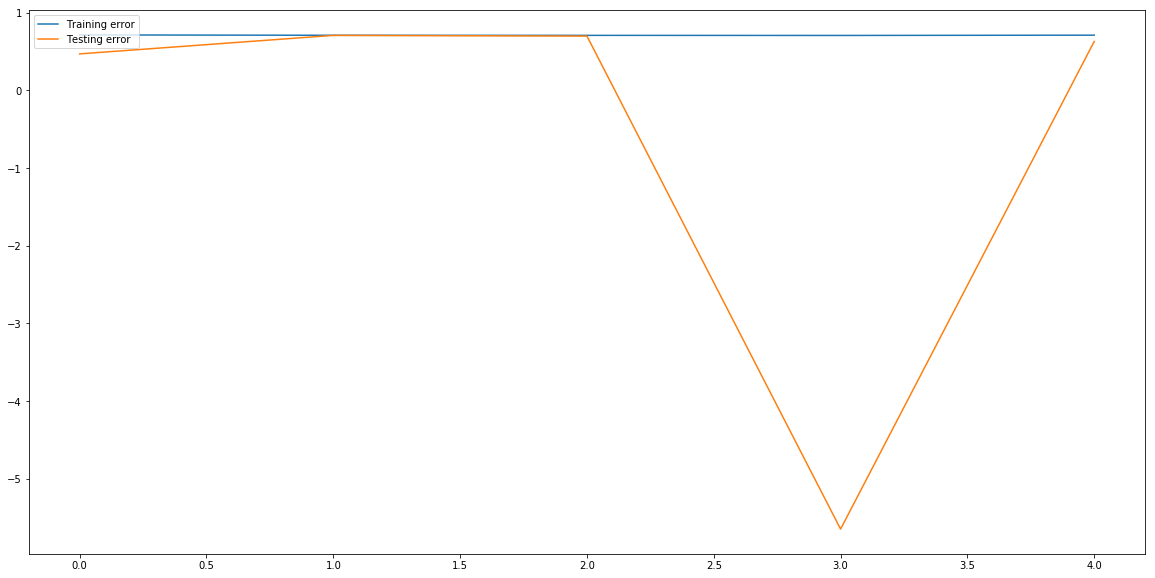

In [67]:
plt.figure(figsize = (20,10))
plt.plot(np.array(Train_error_poly3), label = 'Training error')
plt.plot(np.array(Test_error_poly3), label = 'Testing error')
plt.legend(loc='upper left')
plt.show()

In [68]:
Train_error_poly3 =[]
Test_error_poly3 =[]

Train_error_poly3.clear()
Test_error_poly3.clear()


poly3 = PolynomialFeatures(degree=3)

Model_poly3 = lm.LinearRegression()
# Have to shuffle the data because it is grouped.
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    
    
    X_train_poly3 = poly3.fit_transform(X_train)
    X_test_poly3 = poly3.fit_transform(X_test)
    
    ridge_poly3 = Ridge(12.2)
    ridge_poly3.fit(X_train_poly3, y_train)
    
    #Model_poly3.fit(X_train_poly3, y_train)
    #print(Model_poly3.score(X_train_poly3, y_train))
    print(ridge_poly3.score(X_train_poly3, y_train))
    print(ridge_poly3.score(X_test_poly3, y_test))
    Train_error_poly3.append(ridge_poly3.score(X_train_poly3, y_train))
    Test_error_poly3.append(ridge_poly3.score(X_test_poly3, y_test))
    
print('Training error: ' + str(Train_error_poly3))
print('Testing error: ' + str(Test_error_poly3))
print(np.mean(np.array(Train_error_poly3)))
print(np.mean(np.array(Test_error_poly3)))

0.7069360754534231
0.6236870131955947
0.7075187436878194
0.6989125963102489
0.7085535751522138
0.6904223907460159
0.7081152941359993
0.7004694590906689
0.7091830373654615
0.6885985409129748
Training error: [0.7069360754534231, 0.7075187436878194, 0.7085535751522138, 0.7081152941359993, 0.7091830373654615]
Testing error: [0.6236870131955947, 0.6989125963102489, 0.6904223907460159, 0.7004694590906689, 0.6885985409129748]
0.7080613451589833
0.6804180000511006


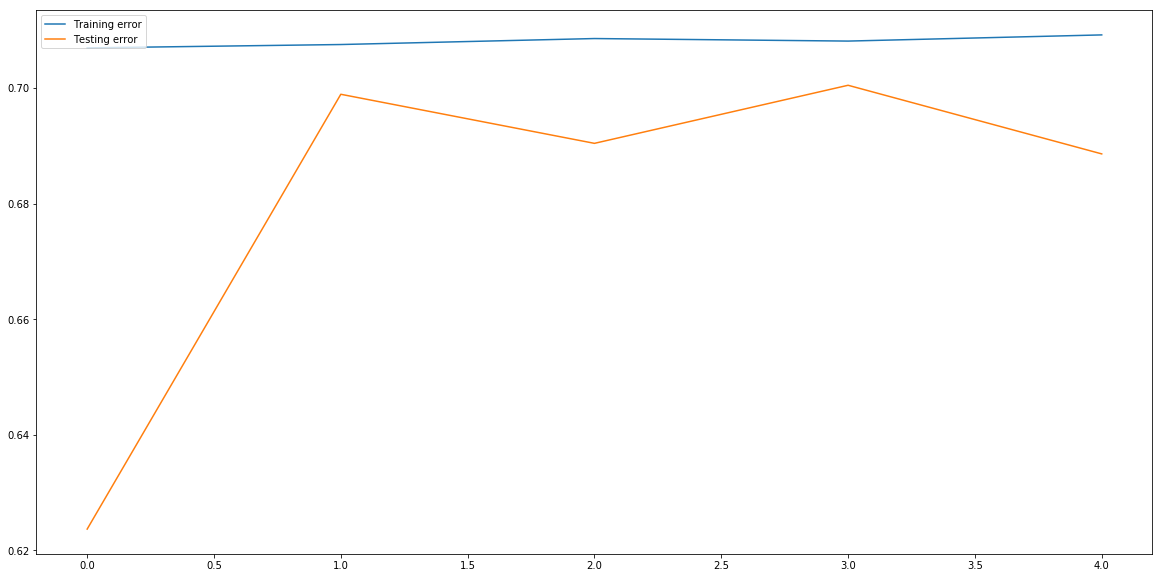

In [69]:
plt.figure(figsize = (20,10))
plt.plot(np.array(Train_error_poly3), label = 'Training error')
plt.plot(np.array(Test_error_poly3), label = 'Testing error')
plt.legend(loc='upper left')
plt.show()

In [63]:
Train_error_poly2 =[]
Test_error_poly2 =[]

Train_error_poly2.clear()
Test_error_poly2.clear()


poly2 = PolynomialFeatures(degree=2)

Model_poly2 = lm.LinearRegression()
# Have to shuffle the data because it is grouped.
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    
    
    X_train_poly2 = poly2.fit_transform(X_train)
    X_test_poly2 = poly2.fit_transform(X_test)
    
    Model_poly2.fit(X_train_poly2, y_train)
    #print(Model_poly3.score(X_train_poly3, y_train))
    Train_error_poly2.append(Model_poly2.score(X_train_poly2, y_train))
    Test_error_poly2.append(Model_poly2.score(X_test_poly2, y_test))
    #print('Training error: ' + str())
    #print('Testing error: ' + str())
print(np.mean(np.array(Train_error_poly2)))
print(np.mean(np.array(Test_error_poly2)))

0.6693357081975239
0.5526163487079276


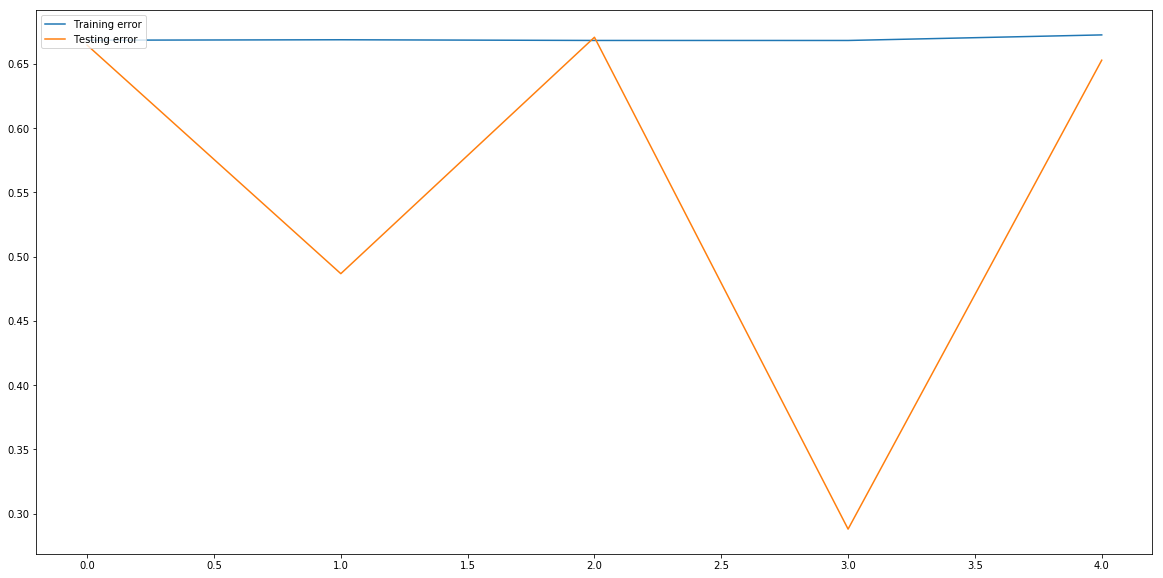

In [64]:
plt.figure(figsize = (20,10))
plt.plot(np.array(Train_error_poly2), label = 'Training error')
plt.plot(np.array(Test_error_poly2), label = 'Testing error')
plt.legend(loc='upper left')
plt.show()

In [51]:
Train_error_poly2 =[]
Test_error_poly2 =[]

Train_error_poly2.clear()
Test_error_poly2.clear()


poly2 = PolynomialFeatures(degree=3)

Model_poly2 = lm.LinearRegression()
# Have to shuffle the data because it is grouped.
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    
    
    X_train_poly2 = poly2.fit_transform(X_train)
    X_test_poly2 = poly2.fit_transform(X_test)
    
    ridge_poly2 = Ridge(14.2)#29.92
    ridge_poly2.fit(X_train_poly2, y_train)
    
    #Model_poly3.fit(X_train_poly3, y_train)
    #print(Model_poly3.score(X_train_poly3, y_train))
    print(ridge_poly2.score(X_train_poly2, y_train))
    print(ridge_poly2.score(X_test_poly2, y_test))
    Train_error_poly2.append(ridge_poly2.score(X_train_poly2, y_train))
    Test_error_poly2.append(ridge_poly2.score(X_test_poly2, y_test))
    
print('Training error: ' + str(Train_error_poly2))
print('Testing error: ' + str(Test_error_poly2))
print(np.mean(np.array(Train_error_poly2)))
print(np.mean(np.array(Test_error_poly2)))

0.7083474599066798
0.6910727791745261
0.711504680854497
0.6854739431412227
0.7054533275631436
0.6668032865829876


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.214017e-28
  overwrite_a=True).T


0.7078191997125715
0.611154280491535
0.7055333147103653
0.7087690468973924
Training error: [0.7083474599066798, 0.711504680854497, 0.7054533275631436, 0.7078191997125715, 0.7055333147103653]
Testing error: [0.6910727791745261, 0.6854739431412227, 0.6668032865829876, 0.611154280491535, 0.7087690468973924]
0.7077315965494515
0.6726546672575326


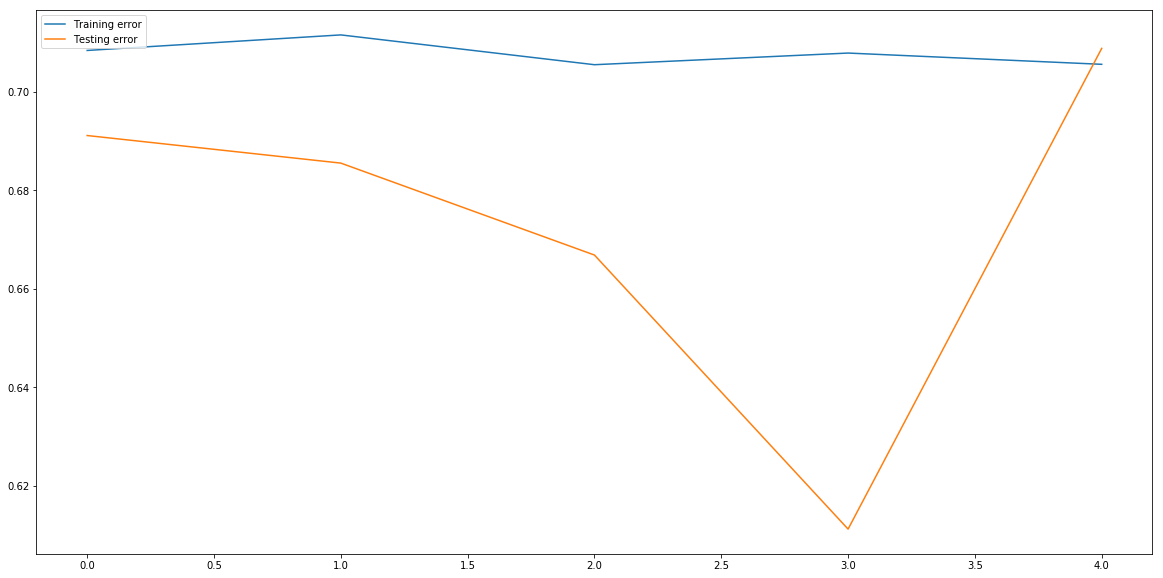

In [62]:
plt.figure(figsize = (20,10))
plt.plot(np.array(Train_error_poly2), label = 'Training error')
plt.plot(np.array(Test_error_poly2), label = 'Testing error')
plt.legend(loc='upper left')
plt.show()